In [299]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## Loading The Data

In [300]:
iris = pd.read_csv('iris.csv')

## Briefing About the Data

In [301]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [302]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,110,7.2,3.6,6.1,2.5,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa


In [303]:
iris.shape

(150, 6)

In [304]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Checking For Duplicates And Null Values 

In [305]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [306]:
iris.duplicated().sum()

0

In [307]:
# There are no null values and duplicated rows in the dataset

In [308]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [309]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [310]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### We can also see that there is not much difference between the values of mean and median (except that of PetalLengthCm -- needs a check)

### Dropping Unwanted Columns

In [311]:
iris = iris.drop(columns= 'Id')

## EDA

In [312]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [313]:
cols = list(iris.columns[:-1])
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

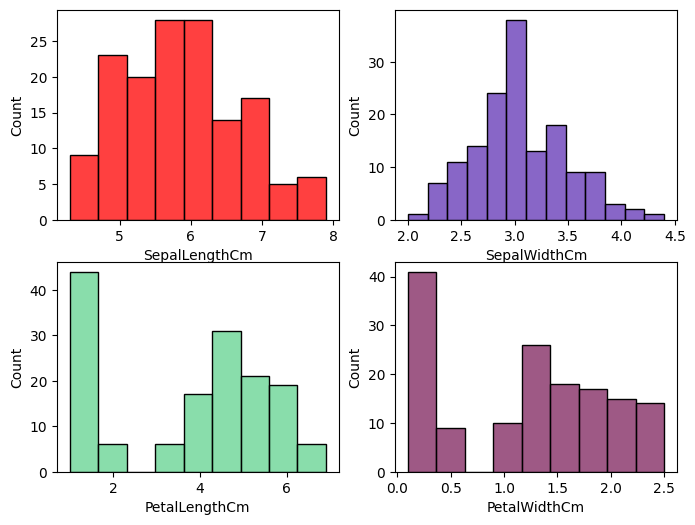

In [314]:
fig = plt.figure(figsize = (8,6))
ax0 = fig.add_subplot(2,2,1)
sns.histplot(x = 'SepalLengthCm' , data = iris , ax = ax0 , color = 'red')
ax1 =  fig.add_subplot(2,2,2)
sns.histplot(x = 'SepalWidthCm' , data = iris , ax = ax1 , color = '#6033B5')
ax2 = fig.add_subplot(2,2,3)
sns.histplot(x = 'PetalLengthCm' , data = iris , ax =  ax2 , color = '#61D28F')
ax3 = fig.add_subplot(2,2,4)
sns.histplot(x = 'PetalWidthCm' , data = iris , ax =  ax3 , color = '#7E215C')

In [315]:
# From Here we can see Petal Length and Petal Width can be good features for the ML model . 

#### we can also make a pairplot which would give us a wholesome idea about the individual distribution of the numerical columns and their correlation with other columns

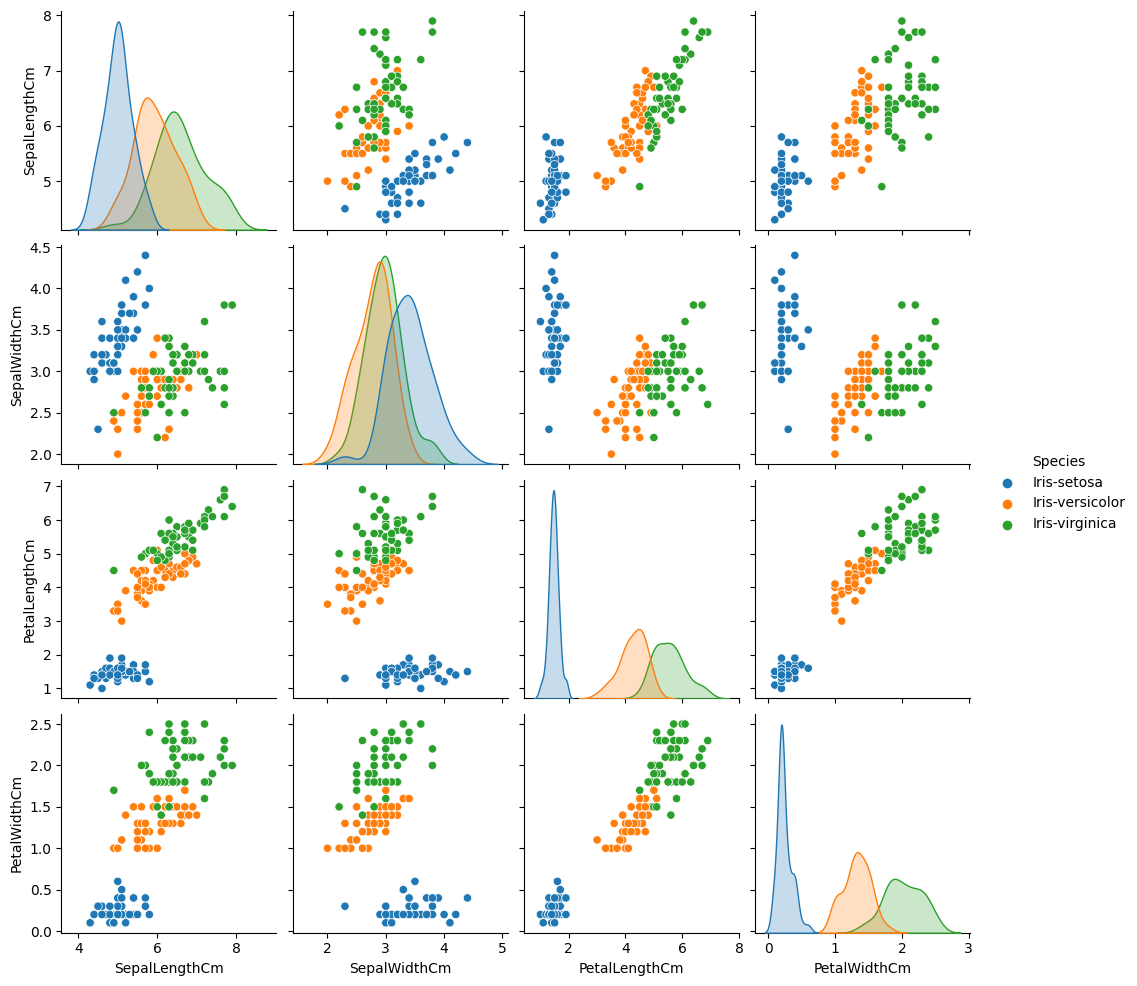

In [316]:
sns.pairplot(iris , hue = 'Species')

#### From here we can see that for almost all the features the setosa flowers are quite distinct from others thus it is expected from the ML model to identify the setosa flowers with greater efficiency than the virginica and the versicolor flowers .

#### The PetalLength and Petal Width are the best features for distinguishing between the different categories . 

## Checking For Outliers   

<Axes: >

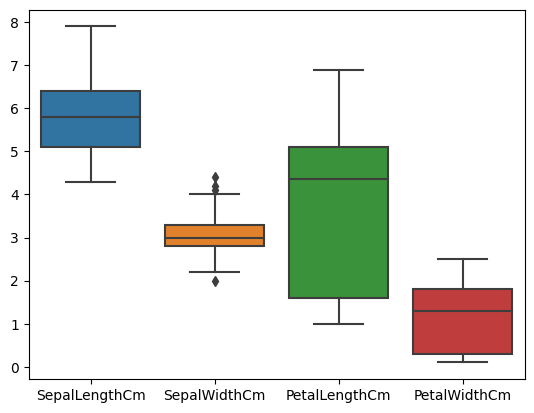

In [317]:
sns.boxplot(data = iris)

In [318]:
# There are some outliers in the SepalWidthCm column which should be taken care of .

In [319]:
iris['SepalWidthCm'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

In [320]:
# calculation of the min and max of the boxplot .
IQR = 3.3- 2.8


In [321]:
min_val = 2.8 - 1.5*IQR
max_val = 3.3 + 1.5*IQR
print(min_val,'-',max_val)

2.05 - 4.05


In [322]:
iris[(iris['SepalWidthCm'] > 4.05) | (iris['SepalWidthCm'] < 2.05)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [323]:
iris.drop(index = [15,32,33,60] , inplace = True)

<Axes: >

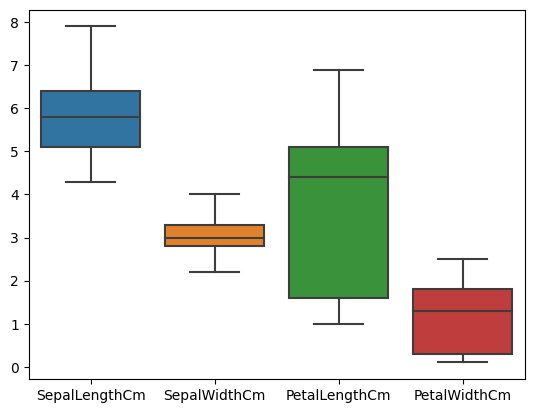

In [324]:
sns.boxplot(data = iris)

In [325]:
# As the data does not has any noise in it thus there is no need to Standardise and Normalise the Dataset . 

In [326]:
skew_lst = [] 
for i in cols:
    skew_lst.append(iris[i].skew())

In [327]:
skew_lst

[0.27841730000040843,
 0.14081170828794973,
 -0.32364863848096104,
 -0.14877741796208035]

In [328]:
pd.DataFrame({'cols' : cols , 'skewness' : skew_lst})

,cols,skewness
0,SepalLengthCm,0.278417
1,SepalWidthCm,0.140812
2,PetalLengthCm,-0.323649
3,PetalWidthCm,-0.148777


#### Unseen Data to be used for testing the model again .

In [329]:
iris.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,5.7,2.6,3.5,1.0,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
31,5.4,3.4,1.5,0.4,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica


In [330]:
data1 = iris.iloc[38]
data2 = iris.iloc[45]
data3 = iris.iloc[73]

In [331]:
print(data1 , data2 , data3)

SepalLengthCm            4.5
SepalWidthCm             2.3
PetalLengthCm            1.3
PetalWidthCm             0.3
Species          Iris-setosa
Name: 41, dtype: object SepalLengthCm            5.3
SepalWidthCm             3.7
PetalLengthCm            1.5
PetalWidthCm             0.2
Species          Iris-setosa
Name: 48, dtype: object SepalLengthCm                6.7
SepalWidthCm                 3.0
PetalLengthCm                5.0
PetalWidthCm                 1.7
Species          Iris-versicolor
Name: 77, dtype: object


In [332]:
iris.drop(index = [38,73,45] , inplace = True)

## Feature Engineering

In [333]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### LabelEncoding

In [334]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
iris['encoded_species'] = le.fit_transform(iris['Species'])

In [335]:
iris.sample(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species
21,5.1,3.7,1.5,0.4,Iris-setosa,0
23,5.1,3.3,1.7,0.5,Iris-setosa,0
11,4.8,3.4,1.6,0.2,Iris-setosa,0
138,6.0,3.0,4.8,1.8,Iris-virginica,2
34,4.9,3.1,1.5,0.1,Iris-setosa,0
97,6.2,2.9,4.3,1.3,Iris-versicolor,1
110,6.5,3.2,5.1,2.0,Iris-virginica,2
24,4.8,3.4,1.9,0.2,Iris-setosa,0
122,7.7,2.8,6.7,2.0,Iris-virginica,2
27,5.2,3.5,1.5,0.2,Iris-setosa,0


In [336]:
encode_df = pd.DataFrame([list(iris['Species'].unique()), list(iris['encoded_species'].unique())]).T

In [337]:
encode_df.columns = ['Species','Encodings']

In [338]:
encode_df

,Species,Encodings
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [339]:
iris2 = iris.copy()

In [340]:
iris.drop(columns = 'Species',inplace = True)

In [341]:
X = iris.iloc[:,:-1]
Y = iris.iloc[:,-1]

In [342]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [343]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state =43 , test_size = 0.3)

In [344]:
x_train.shape

(100, 4)

In [345]:
x_test.shape

(43, 4)

In [346]:
clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
clf.fit(x_train , y_train)


DecisionTreeClassifier()

In [347]:
print('The score of the model is ',clf.score(x_test,y_test)*100)

The score of the model is  90.69767441860465


## Model Evaluation

In [348]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score 
expected = y_test 
predicted = clf.predict(x_test)

In [349]:
print('The classification report is \n', classification_report(expected,predicted))

The classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89        18
           2       0.85      0.85      0.85        13

    accuracy                           0.91        43
   macro avg       0.91      0.91      0.91        43
weighted avg       0.91      0.91      0.91        43



##### As expected The model was most accurate in distinguishing the setosa flowers followed by versicolor and then virginica. 

In [350]:
print('The confusion matrix is \n',confusion_matrix(expected,predicted))

The confusion matrix is 
 [[12  0  0]
 [ 0 16  2]
 [ 0  2 11]]


In [351]:
x_test.shape

(43, 4)

<Axes: >

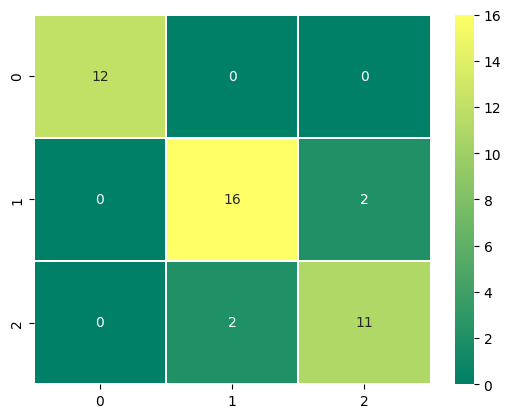

In [352]:
sns.heatmap(confusion_matrix(expected,predicted) , annot = True , linewidth =0.2 , cmap = 'summer')

In [353]:
print('The accuracy score is \n',round(accuracy_score(expected,predicted)*100,4) , '%')

The accuracy score is 
 90.6977 %


## Printing the Decision Tree

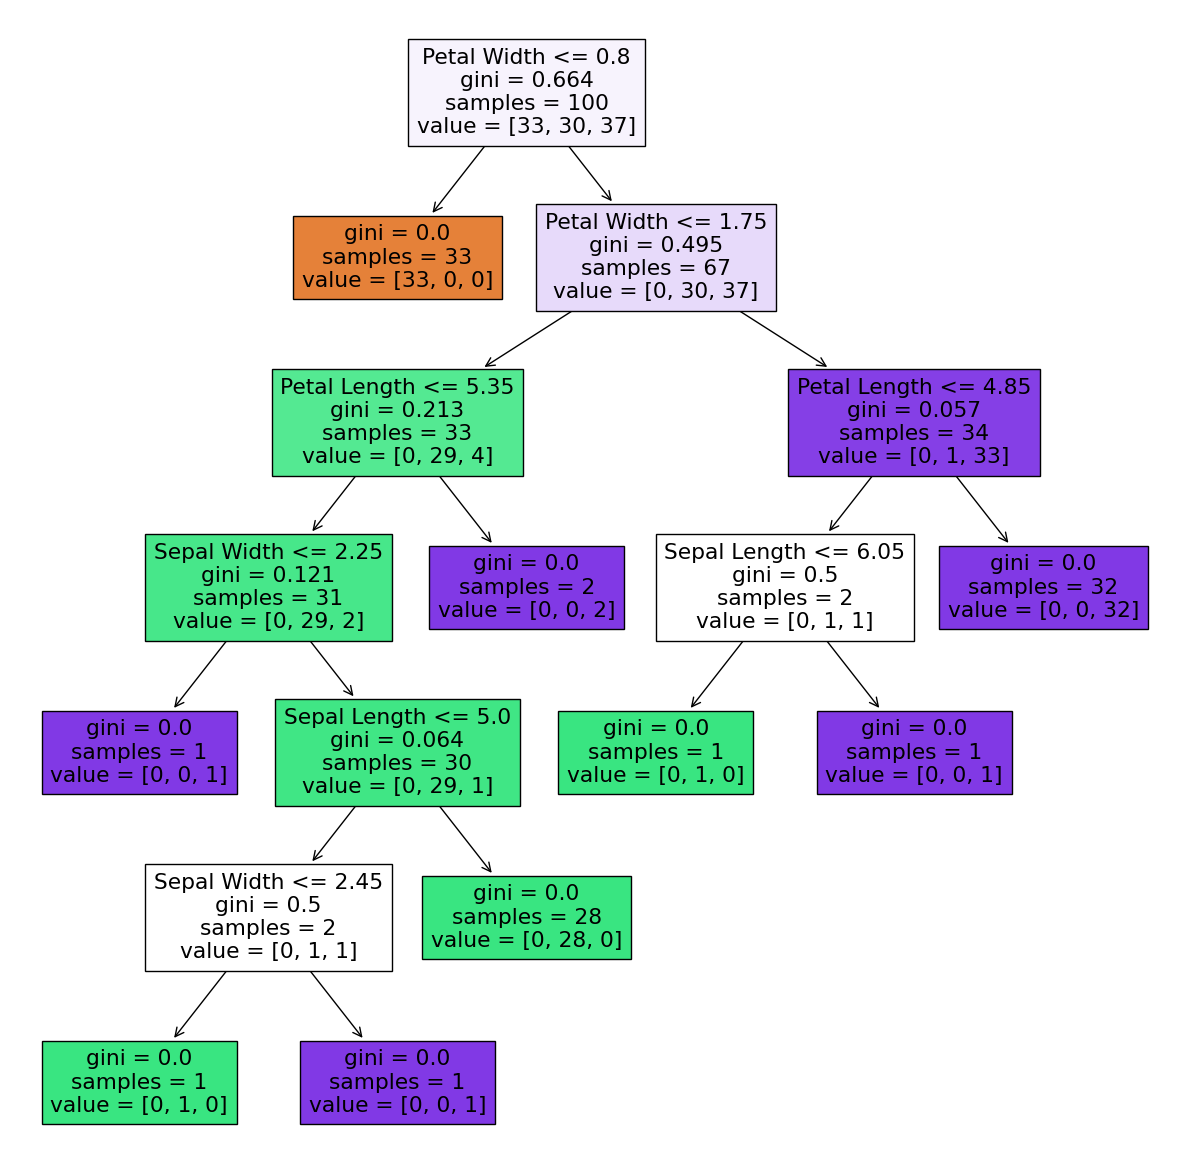

In [381]:
from sklearn import tree 
plt.figure(figsize = (15,15))
tree.plot_tree(clf  , filled = True , feature_names = ['Sepal Length' , 'Sepal Width' , 'Petal Length','Petal Width'])
plt.show()

In [354]:
## Testing the model on the data points we had removed earlier 

In [355]:
x_test.iloc[3]

SepalLengthCm    6.2
SepalWidthCm     2.9
PetalLengthCm    4.3
PetalWidthCm     1.3
Name: 97, dtype: float64

In [356]:
pred_data_1 = clf.predict(data1.drop(index = 'Species').values.reshape(1,-1))
pred_data_2 = clf.predict(data2.drop(index = 'Species').values.reshape(1,-1))
pred_data_3 = clf.predict(data3.drop(index = 'Species').values.reshape(1,-1))

C:\Users\91700\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91700\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91700\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [357]:
data1.drop(index = 'Species')

SepalLengthCm    4.5
SepalWidthCm     2.3
PetalLengthCm    1.3
PetalWidthCm     0.3
Name: 41, dtype: object

In [358]:
pred_data_3

array([1])

In [359]:
data3

SepalLengthCm                6.7
SepalWidthCm                 3.0
PetalLengthCm                5.0
PetalWidthCm                 1.7
Species          Iris-versicolor
Name: 77, dtype: object

In [360]:
encode_df

,Species,Encodings
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [370]:
pred_data_3

array([1])

In [365]:
data1

SepalLengthCm            4.5
SepalWidthCm             2.3
PetalLengthCm            1.3
PetalWidthCm             0.3
Species          Iris-setosa
Name: 41, dtype: object

In [366]:
data2


SepalLengthCm            5.3
SepalWidthCm             3.7
PetalLengthCm            1.5
PetalWidthCm             0.2
Species          Iris-setosa
Name: 48, dtype: object

In [367]:
data3

SepalLengthCm                6.7
SepalWidthCm                 3.0
PetalLengthCm                5.0
PetalWidthCm                 1.7
Species          Iris-versicolor
Name: 77, dtype: object

#### Our model successfully classified the Species of all 3 testing points we had considered.

## Loading the file 

In [371]:
import pickle

In [374]:
pickle.dump(clf,open('Decision_Tree_Classifier_open','wb'))

In [375]:
loaded_file = pickle.load(open('Decision_Tree_Classifier_open','rb'))

In [376]:
loaded_file.score(x_test,y_test)

0.9069767441860465